#### **Data Augmentation using Horizontal Flip and Rotate 90 degree**

In [1]:
import os
import Augmentor

In [2]:
# Average image file per object = 1350
def augument_horizontal_flip_crop(data_dir, label, out_dir, num_transformation=1):
    data_fp = os.path.join(data_dir, label)
    out_fp = os.path.join(out_dir, label)
    
    aug_pipeline = Augmentor.Pipeline(source_directory=data_fp, output_directory=out_fp)
    aug_pipeline.flip_left_right(probability=0.5)
    aug_pipeline.crop_random(probability=0.5, percentage_area=0.3)
    num_of_samples = int(1350+600)
    
    aug_pipeline.sample(num_of_samples)

In [3]:
folder_names = ['cassette_player', 'chain_saw', 'church', 'english_springer', 'french_horn', 'garbage_truck', 'gas_pump', 'golf_ball', 'parachute', 'tench']

In [4]:
data_dir = "dataset/"
out_dir = os.path.join(os.getcwd(), "dataset_horizontal_flip_crop")

In [5]:
for folder_name in folder_names:
    augument_horizontal_flip_crop(data_dir=data_dir, label=folder_name, out_dir=out_dir)

Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/cassette_player.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=361x160 at 0x7F3E3C36A080>: 100%|██████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 488.62 Samples/s]


Initialised with 1250 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/chain_saw.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F3E3C337D60>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 481.80 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/church.

Processing <PIL.Image.Image image mode=RGB size=68x48 at 0x7F3E3C6210F0>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 488.24 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/english_springer.

Processing <PIL.Image.Image image mode=RGB size=48x61 at 0x7F3E3C59C820>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 483.08 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/french_horn.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F3E3C620310>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 487.48 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/garbage_truck.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F3E3C3837C0>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 464.14 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/gas_pump.

Processing <PIL.Image.Image image mode=RGB size=48x63 at 0x7F3E3C6222C0>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 485.85 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/golf_ball.

Processing <PIL.Image.Image image mode=RGB size=240x160 at 0x7F3E3C4AFBE0>: 100%|████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 485.65 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/parachute.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=209x160 at 0x7F3E3E70A290>: 100%|██████████████████████████████████████████████████████████████| 1950/1950 [00:03<00:00, 514.11 Samples/s]


Initialised with 1350 image(s) found.
Output directory set to /home/sasmi/Desktop/Lakehead University/COMP-5422-FA Comp Vision & Image Analysis/Projects/comp-5422/dataset_horizontal_flip_crop/tench.

Processing <PIL.Image.Image image mode=RGB size=63x48 at 0x7F3E3E671FC0>: 100%|██████████████████████████████████████████████████████████████████████████████████| 1950/1950 [00:04<00:00, 485.51 Samples/s]


#### **Mapping the dataset**

In [6]:
import os
from os import walk

import pandas as pd
from sklearn.model_selection import train_test_split

In [7]:
current_dir = os.path.abspath(os.getcwd())
data_path = "dataset_horizontal_flip_crop/"
data_mapping = []

for (dirpath, dirnames, filenames) in walk(data_path):
    if filenames:
        label_name = dirpath.split("/")[-1]
        data_full_fp = [os.path.join(current_dir, dirpath, fname) for fname in filenames]
        
        for data_fp in data_full_fp:
            data_mapping.append([data_fp, label_name])

In [8]:
data_df = pd.DataFrame(data_mapping, columns=["filename", "label"])
data_df.head()

,filename,label
0,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
1,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
2,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
3,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw
4,/home/sasmi/Desktop/Lakehead University/COMP-5...,chain_saw


In [9]:
labels_map = {
    'cassette_player': 0,
    'chain_saw': 1,
    'church': 2,
    'english_springer': 3,
    'french_horn': 4,
    'garbage_truck': 5,
    'gas_pump': 6,
    'golf_ball': 7,
    'parachute': 8,
    'tench': 9
}

In [10]:
train, test = train_test_split(data_df, 
                               test_size=0.2, 
                               stratify=data_df["label"], 
                               random_state=42)
print(train.shape)
print(test.shape)

(15600, 2)
(3900, 2)


In [11]:
train.to_csv(os.path.join(data_path, "train.csv"), index=False)
test.to_csv(os.path.join(data_path, "test.csv"), index=False)

#### **Modelling Using the Augmentated Data**

In [12]:
import os
import pandas as pd
from PIL import Image
from datetime import datetime

import torch
import torch.nn as nn
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import torchvision.models as models

from imgaug import augmenters as iaa

import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [13]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, labels_map, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_labels['label'] = self.img_labels['label'].map(labels_map)
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = self.img_labels.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        
        label = torch.tensor(int(self.img_labels.iloc[idx, 1]), dtype=torch.uint8)
        
        if self.transform:
            image = self.transform(image)
            
        return image, label

In [14]:
class ResNetModel(nn.Module):
    def __init__(self, num_classes):
        super(ResNetModel, self).__init__()
        self.resnet18 = models.resnet18(pretrained=False)
        self.resnet18.fc = nn.Linear(in_features=512, out_features=num_classes)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.resnet18(x)

In [15]:
def create_dir(dir_name):
    if not os.path.exists(dir_name):
        os.makedirs(dir_name)
        
    else:
        pass

In [16]:
def dump_model(training_id, model_dir, model):
    model_name = f"{training_id}_resnet18_od.pth"
    create_dir(dir_name=model_dir)
        
    model_dump_fp = os.path.join(model_dir, model_name)
    torch.save(model.state_dict(), model_dump_fp)

In [17]:
labels_map = {
    'cassette_player': 0,
    'chain_saw': 1,
    'church': 2,
    'english_springer': 3,
    'french_horn': 4,
    'garbage_truck': 5,
    'gas_pump': 6,
    'golf_ball': 7,
    'parachute': 8,
    'tench': 9
}

In [18]:
train_annotation_fp = "dataset_horizontal_flip_crop/train.csv"
test_annotation_fp = "dataset_horizontal_flip_crop/test.csv"

model_dir = "./models"
training_id = f"horizontal_flip_crop_{datetime.utcnow().timestamp()}"

log_dir = os.path.join("./log_dir", training_id)
create_dir(log_dir)

In [19]:
# ResNet-18 expects input images of size (224, 224)
feature_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
])

train_dataset = CustomImageDataset(annotations_file=train_annotation_fp, 
                                   labels_map=labels_map,
                                   transform=feature_transform,
                                  )
test_dataset = CustomImageDataset(annotations_file=test_annotation_fp, 
                                  labels_map=labels_map,
                                  transform=feature_transform,
                                 )

# Define the DataLoader
batch_size = 16
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [20]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([16, 3, 224, 224])
Labels batch shape: torch.Size([16])


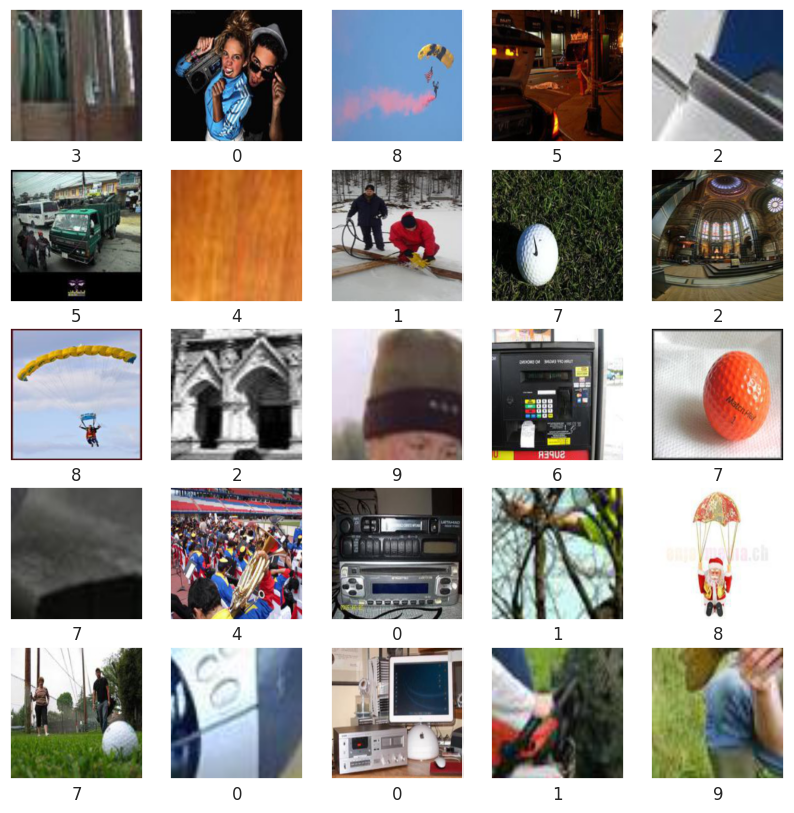

In [21]:
# Plotting some image samples from the dataloaders
plt.figure(figsize=(10,10))
for i in range(25):
    train_features, train_labels = next(iter(train_dataloader))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_features[0].numpy().transpose((1, 2, 0)))
    plt.xlabel(train_labels[0].tolist())
plt.show()

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
num_class = 10
learning_rate = 1e-03
num_epoch = 20
save_model = True

model = ResNetModel(num_classes=num_class)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

/home/sasmi/anaconda3/envs/jarvis/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/sasmi/anaconda3/envs/jarvis/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [23]:
model.train()
model.to(device)

epoch_ls, total_loss, total_accuracy = [], [], []

for epoch in range(num_epoch):

    loss_train, acc_train = 0, 0
    total_samples = 0
    
    for i, data in enumerate(train_dataloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # calculate the loss and accuracy
        loss_train += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        acc_train += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        loss.backward()
        optimizer.step()
    
    epoch_loss = loss_train / len(train_dataloader)
    epoch_accuracy = acc_train / total_samples
    
    epoch_ls.append(epoch)
    total_loss.append(epoch_loss)
    total_accuracy.append(epoch_accuracy)
    
    print(f"Current epoch: {epoch} | Training Accuracy: {epoch_accuracy} | Training Loss: {epoch_loss}")
    
if save_model:
    dump_model(training_id, model_dir, model)

Current epoch: 0 | Training Accuracy: 0.25243589743589745 | Training Loss: 2.10495122334896
Current epoch: 1 | Training Accuracy: 0.33442307692307693 | Training Loss: 1.9130557250976563
Current epoch: 2 | Training Accuracy: 0.39782051282051284 | Training Loss: 1.758009977707496
Current epoch: 3 | Training Accuracy: 0.4582051282051282 | Training Loss: 1.5931904224249034
Current epoch: 4 | Training Accuracy: 0.5030128205128205 | Training Loss: 1.4800604587946182
Current epoch: 5 | Training Accuracy: 0.5398717948717948 | Training Loss: 1.3746708854345175
Current epoch: 6 | Training Accuracy: 0.5661538461538461 | Training Loss: 1.2847583812322372
Current epoch: 7 | Training Accuracy: 0.6023717948717948 | Training Loss: 1.1978732036015927
Current epoch: 8 | Training Accuracy: 0.6292307692307693 | Training Loss: 1.1059467008174995
Current epoch: 9 | Training Accuracy: 0.6587179487179488 | Training Loss: 1.0142468571662904
Current epoch: 10 | Training Accuracy: 0.6948717948717948 | Training L

In [24]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_dataloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
test_acc = 100 * correct // total
print(f'Test Accuracy: {test_acc}%')

Test Accuracy: 61%


In [25]:
train_metrics_df = pd.DataFrame(zip(epoch_ls, total_loss, total_accuracy), columns=["epoch", "loss", "accuracy"])
train_metrics_df.to_csv(f"{os.path.join(log_dir, 'training_metrics.csv')}", index=False)
train_metrics_df

,epoch,loss,accuracy
0,0,2.104951,0.252436
1,1,1.913056,0.334423
2,2,1.758010,0.397821
3,3,1.593190,0.458205
4,4,1.480060,0.503013
5,5,1.374671,0.539872
6,6,1.284758,0.566154
7,7,1.197873,0.602372
8,8,1.105947,0.629231
9,9,1.014247,0.658718


In [26]:
test_acc = 100 * correct // total

In [27]:
test_metrics_df = pd.DataFrame([test_acc], columns=["accuracy"])
test_metrics_df.to_csv(f"{os.path.join(log_dir, 'test_metrics.csv')}", index=False)
test_metrics_df

,accuracy
0,61


<Axes: xlabel='epoch', ylabel='value'>

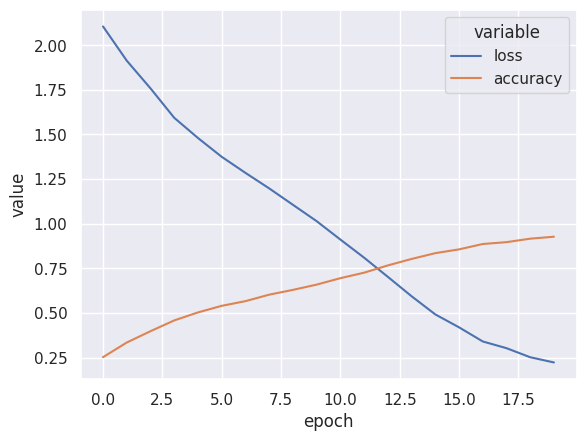

In [28]:
sns.lineplot(data=pd.melt(train_metrics_df, ["epoch"]), x="epoch", y="value", hue="variable")

### Deprecated Codes

In [ ]:
# img = train_features[0].numpy().transpose((1, 2, 0))
# label = train_labels[0]
# plt.imshow(img)
# plt.show()
# print(f"Label: {label}")